## Compare missclassified tables

Best models:

* Manual features: Retrained Random Forest classifier
* Visual features: ResNet50 freeze CNN classifier
* Combined features: VGG16 freeze all level features features + manual features Random Forest classifier



In [1]:
import numpy as np
import os
import cv2 as cv2
import tensorflow as tf 
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import random

In [4]:

def load_images_from_folder(folder, ids):
    images = []
    img_ids = []
    for i in ids:
        filename= "id_"+ str(i)+ ".jpg"
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            img_ids.append(i)
    return images, img_ids

fold1= r'E:\Babette\MasterThesis\GoldStandard_tvt\test\0_layout'
fold2= r'E:\Babette\MasterThesis\GoldStandard_tvt\test\1_Genuine'

### Manual features

In [3]:
# Retrained RF with heuristic features
id_heu = np.load(r'E:\Babette\MasterThesis\Feature_extractor\heur_false_id.npy')

In [172]:
random.choices(id_heu, k=10)

[7681, 8348, 1764, 6720, 4356, 1302, 1302, 4356, 9525, 10172]

In [37]:
layout_misscl, layout_ids= load_images_from_folder(fold1,random.choices(id_heu, k=40))
genuine_misscl, genuine_ids= load_images_from_folder(fold2,random.choices(id_heu, k=40))

In [113]:
#layout_misscl, layout_ids= load_images_from_folder(fold1,id_heu[:200])
#genuine_misscl, genuine_ids= load_images_from_folder(fold2,id_heu[:200])

In [21]:
print(len(layout_misscl))
print(len(genuine_misscl))

9
18


In [18]:
#nested gen:
#id_heu=[1302, 1730, 1764, 2046, 2596, 2785, 4356, 5699, 5770, 6000, 6136, 6561, 6680, 6720, 6755, 6790, 6935, 7399, 7681, 8040, 8348, 8537, 9465, 9525, 9680, 9901, 10172, 10188, 11544, 12009, 12818, 12959]
#genuine_misscl, genuine_ids= load_images_from_folder(fold2,random.choices(id_heu, k=60))

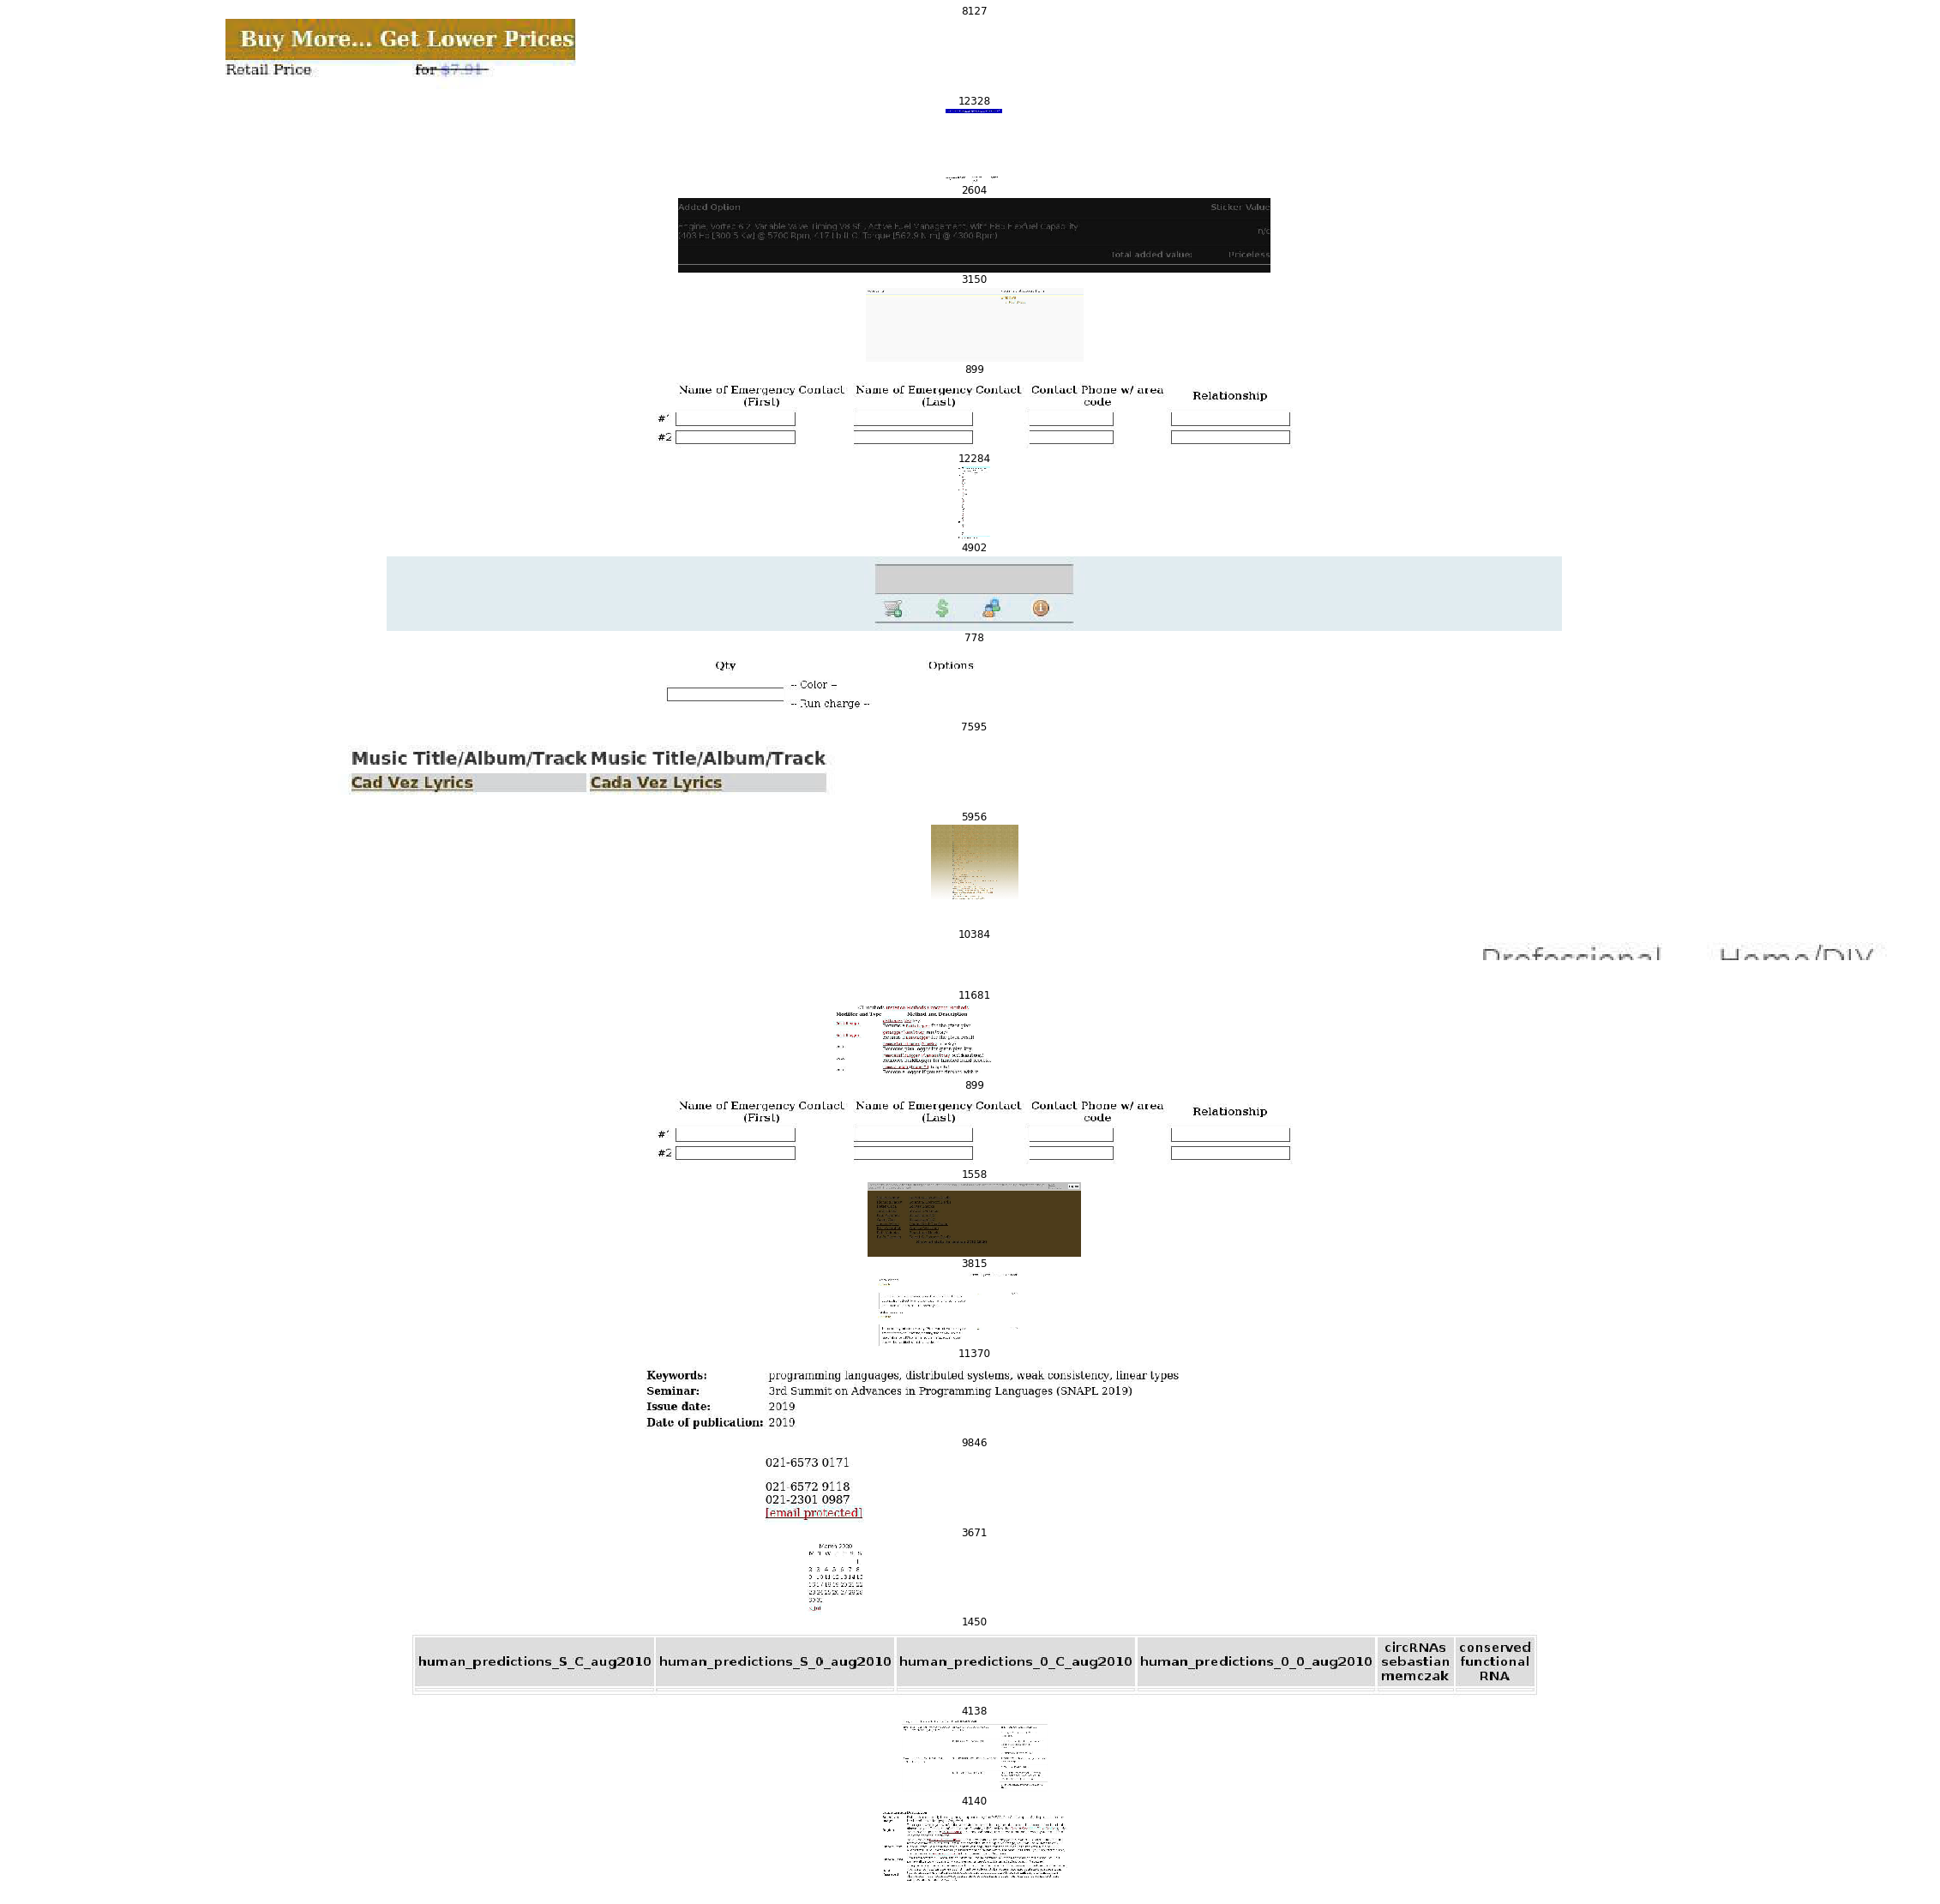

In [38]:
#missclassified Layout tables
plt.figure(figsize=(40, 40))
#plt.rcParams["figure.figsize"] = (60,30)
#plt.rcParams['figure.dpi'] = 400
#for images, labels in train_ds.take(1):
for i in range(len(layout_misscl)):
    ax = plt.subplot(len(layout_misscl), 1, i + 1)
    plt.imshow(layout_misscl[i].astype("uint8"))
    plt.title(layout_ids[i])
    plt.axis("off")


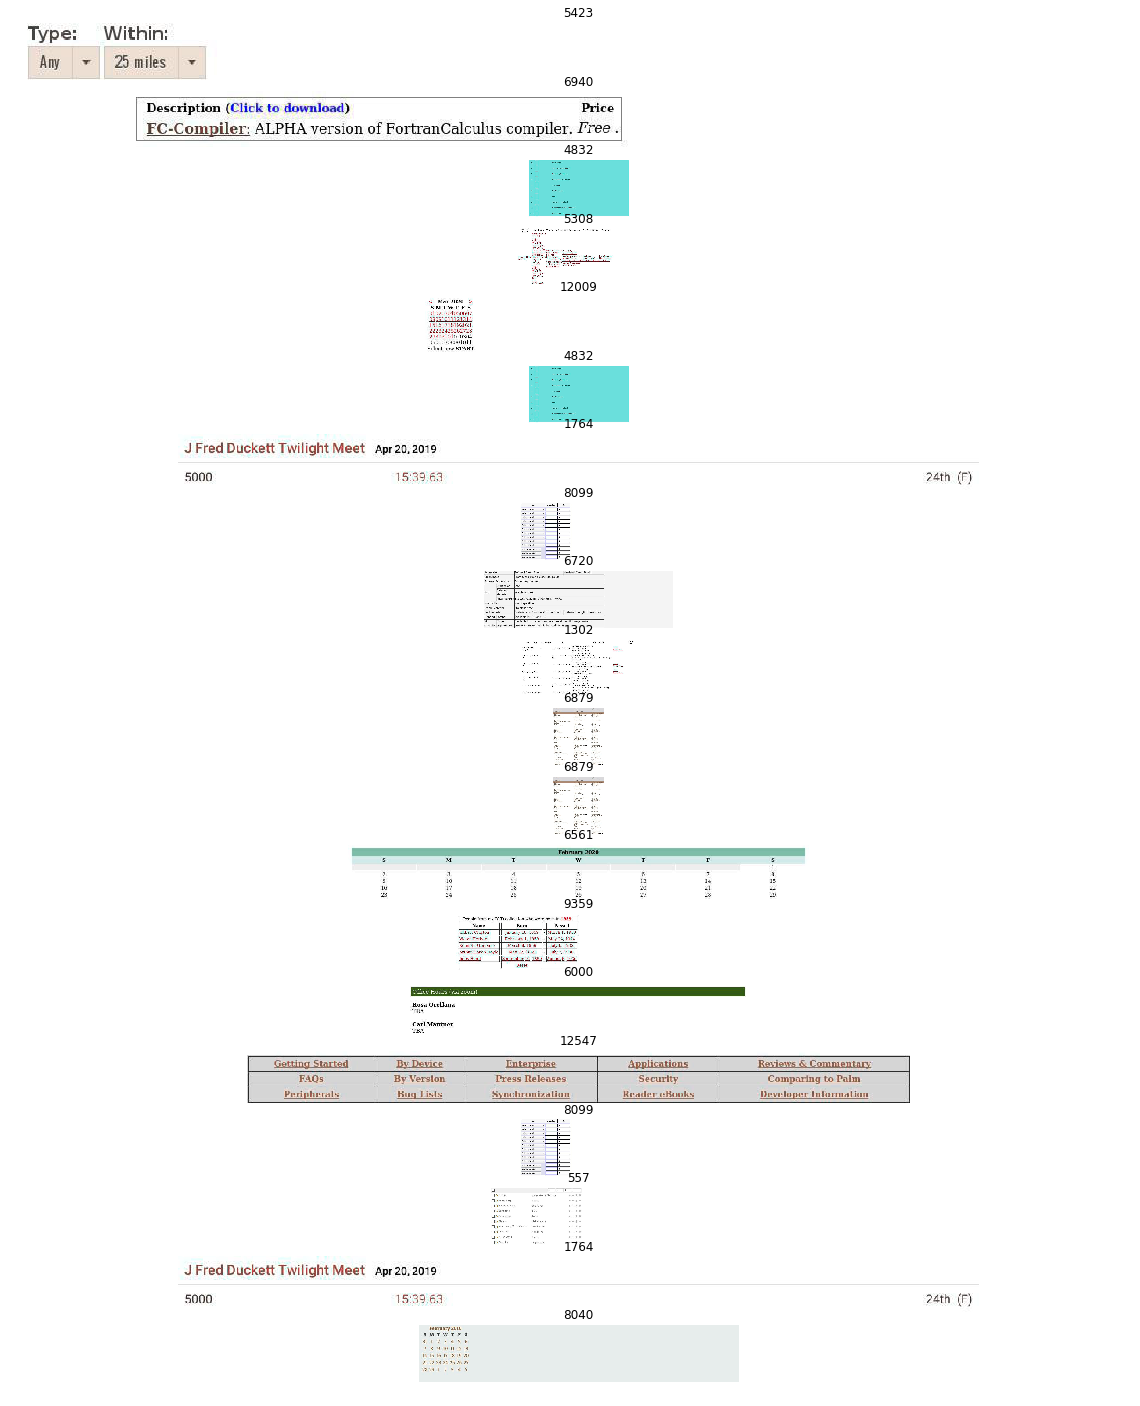

In [7]:
#missclassified genuine tables
plt.figure(figsize=(20, 25))
for i in range(len(genuine_misscl)):
    ax = plt.subplot(len(genuine_misscl), 1, i + 1)
    plt.imshow(genuine_misscl[i].astype("uint8"))
    plt.title(genuine_ids[i])
    plt.axis("off")


### Visual features


In [40]:
# ResNet CNN 
id_heu = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\false_id.npy')

In [41]:
layout_misscl, layout_ids= load_images_from_folder(fold1,random.choices(id_heu, k=20))
genuine_misscl, genuine_ids= load_images_from_folder(fold2,random.choices(id_heu, k=20))

In [119]:
layout_misscl, layout_ids= load_images_from_folder(fold1,id_heu[:200])
genuine_misscl, genuine_ids= load_images_from_folder(fold2,id_heu[:200])

In [42]:
print(len(layout_misscl))
print(len(genuine_misscl))

10
7


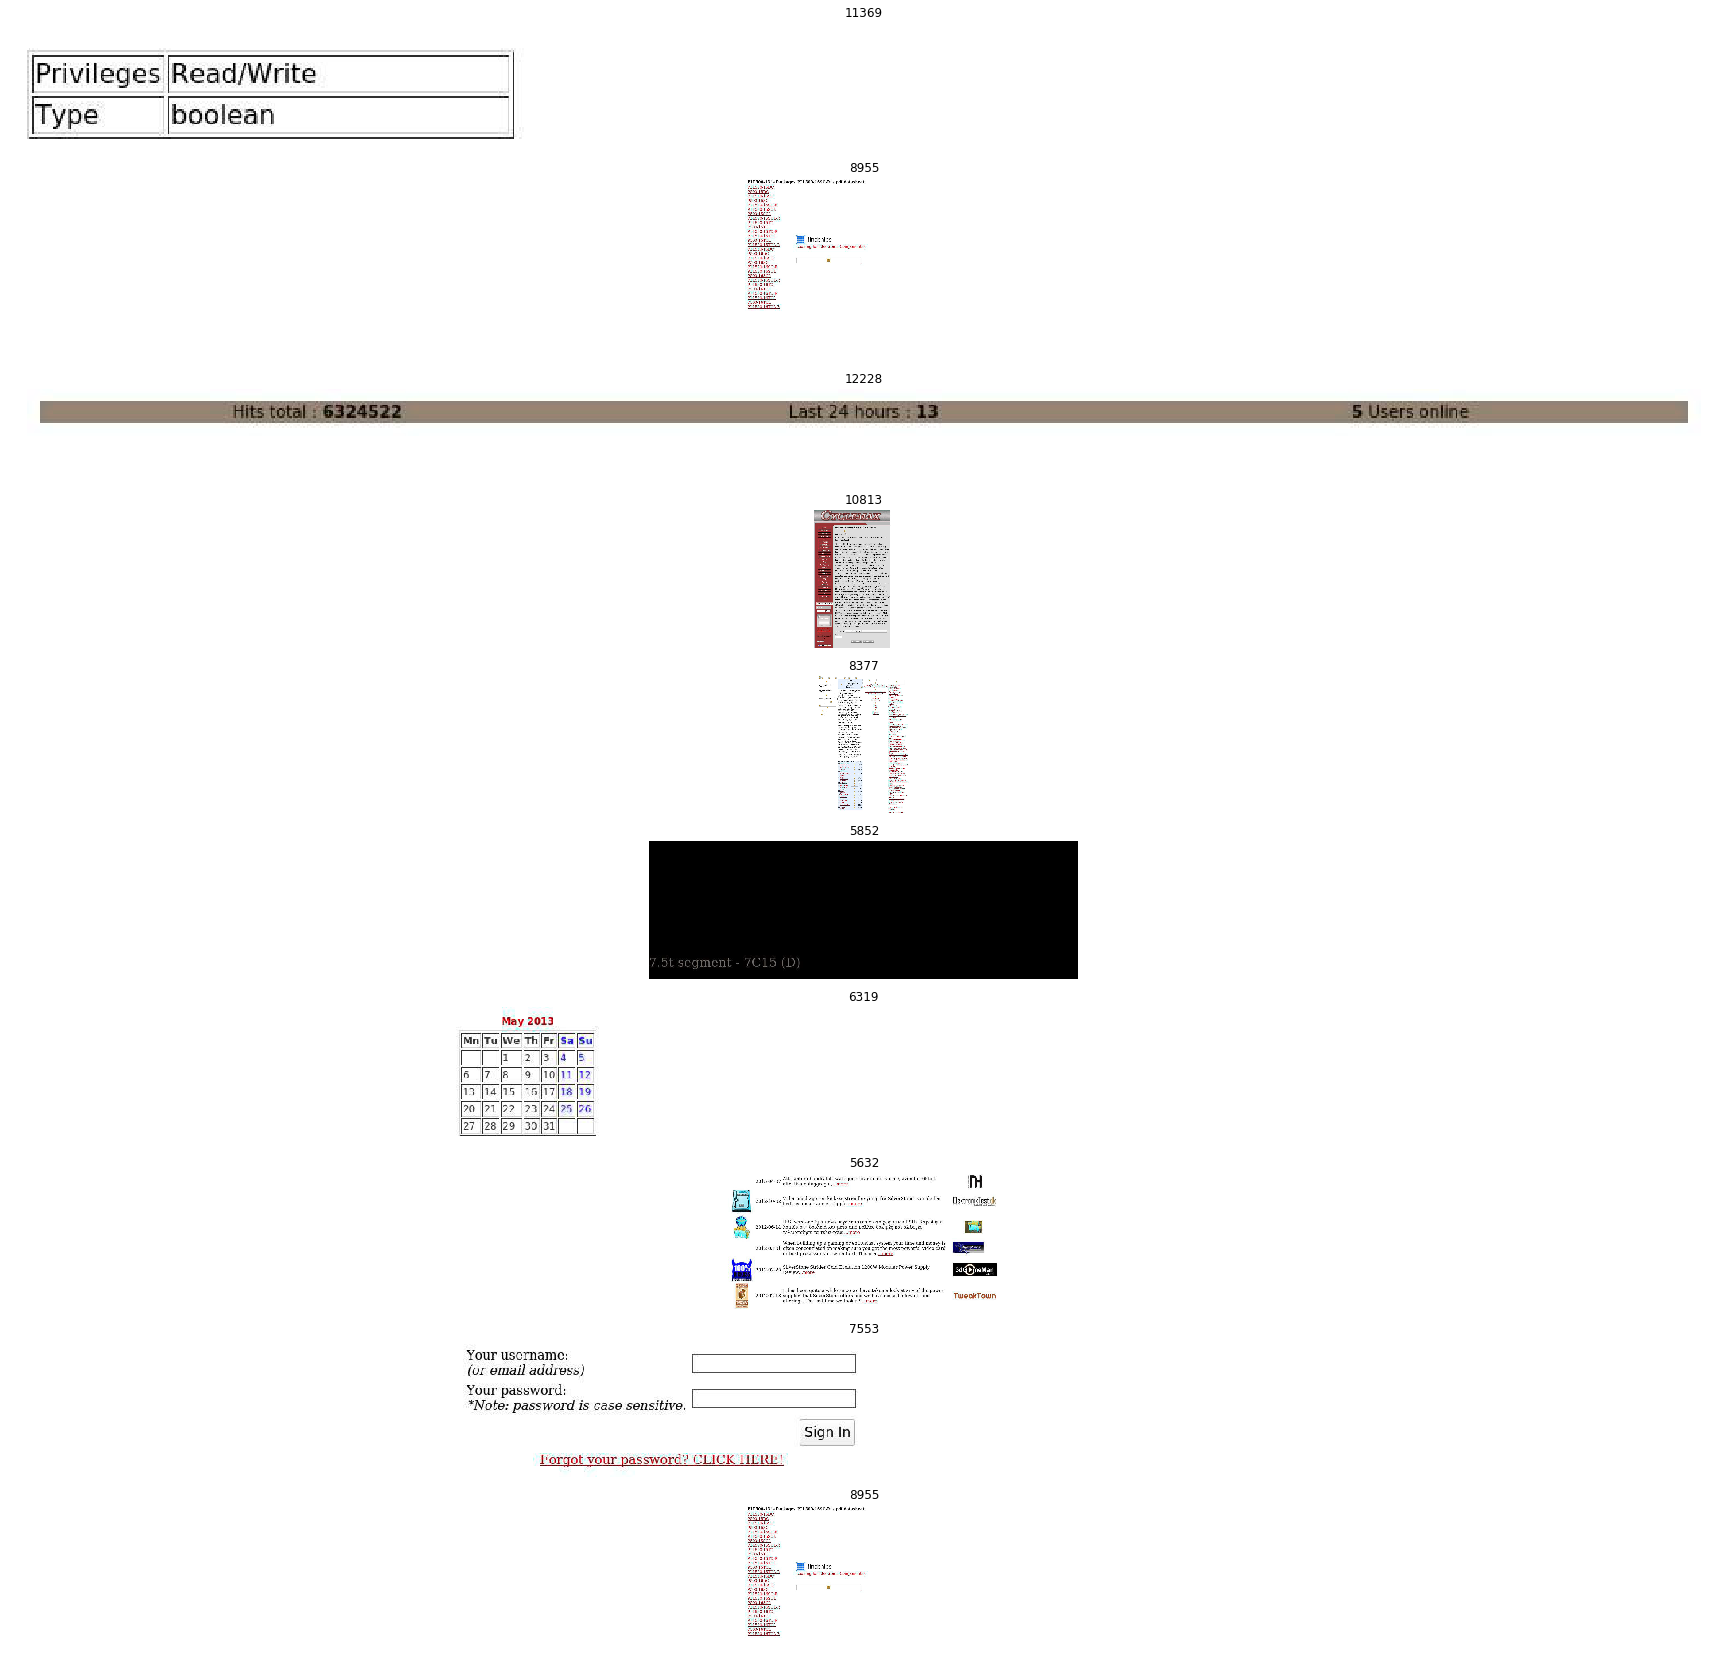

In [47]:

#missclassified Layout tables
#plt.figure(figsize=(40, 40))
plt.rcParams["figure.figsize"] = (30,30)
#plt.rcParams['figure.dpi'] = 400
#for images, labels in train_ds.take(1):
for i in range(len(layout_misscl)):
    ax = plt.subplot(len(layout_misscl), 1, i + 1)
    plt.imshow(layout_misscl[i].astype("uint8"))
    plt.title(layout_ids[i])
    plt.axis("off")

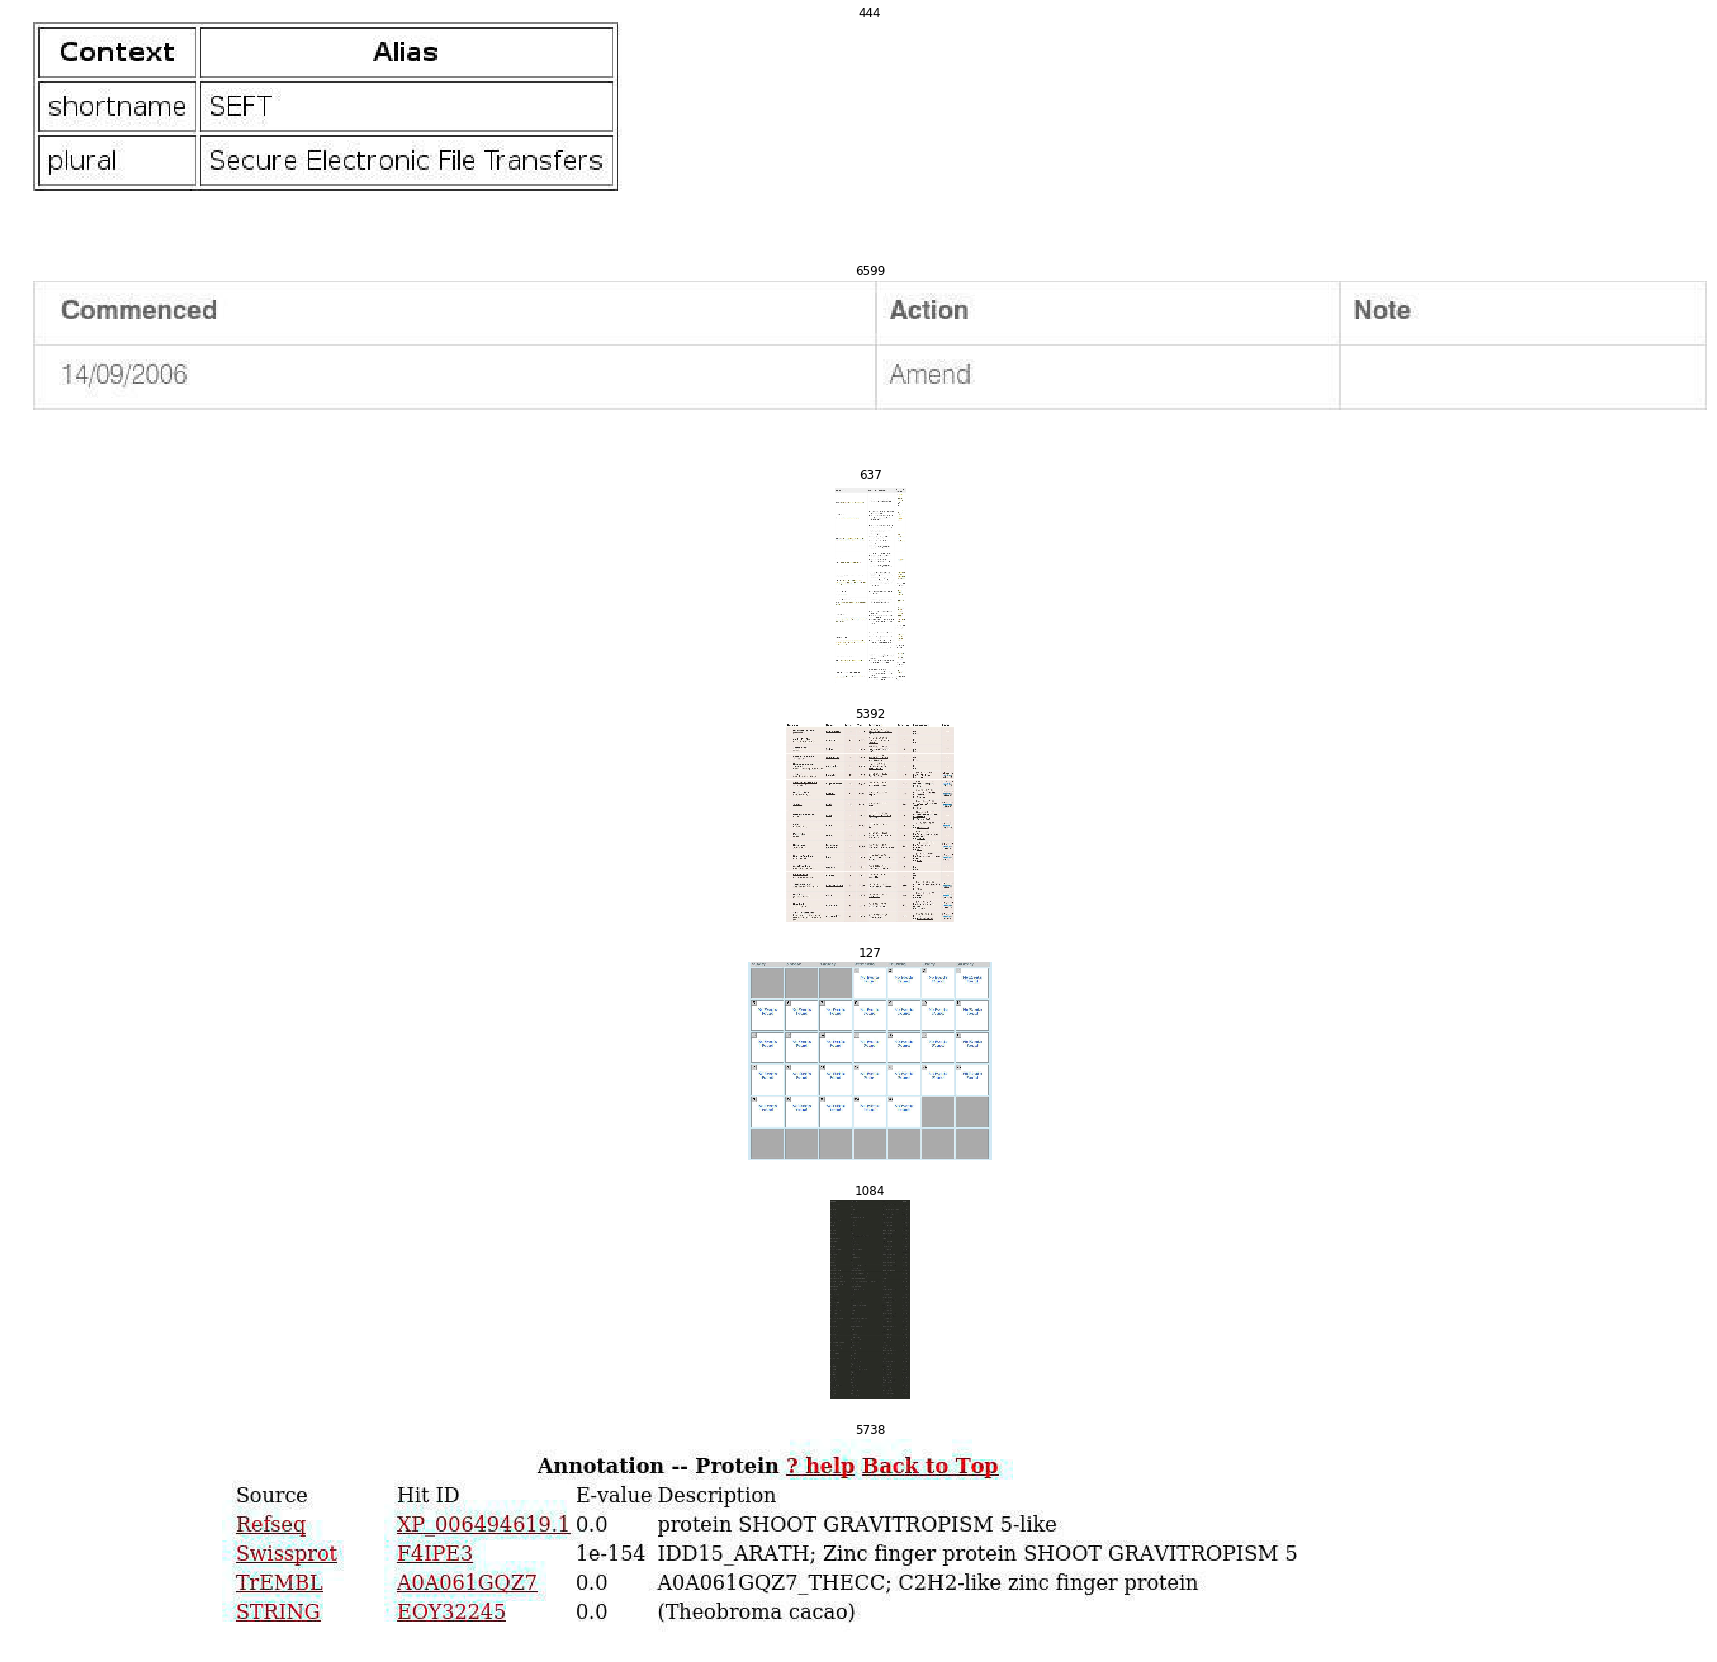

In [63]:
genuine_misscl, genuine_ids= load_images_from_folder(fold2,random.choices(id_heu, k=20))
#missclassified Layout tables
#plt.figure(figsize=(40, 40))
plt.rcParams["figure.figsize"] = (30,30)
#plt.rcParams['figure.dpi'] = 400
#for images, labels in train_ds.take(1):
for i in range(len(genuine_misscl)):
    ax = plt.subplot(len(genuine_misscl), 1, i + 1)
    plt.imshow(genuine_misscl[i].astype("uint8"))
    plt.title(genuine_ids[i])
    plt.axis("off")

### Visual and manual features

In [2]:
# ResNet CNN 
id_heu = np.load(r'E:\Babette\MasterThesis\Feature_extractor\VGG16_imagenet\All_feature_maps\rf_classifier\vgg16_maps_heur_false_id.npy')

In [5]:
layout_misscl, layout_ids= load_images_from_folder(fold1,random.choices(id_heu, k=20))
genuine_misscl, genuine_ids= load_images_from_folder(fold2,random.choices(id_heu, k=20))

In [124]:
layout_misscl, layout_ids= load_images_from_folder(fold1,id_heu[:200])
genuine_misscl, genuine_ids= load_images_from_folder(fold2,id_heu[:200])

In [6]:
print(len(layout_misscl))
print(len(genuine_misscl))

13
12


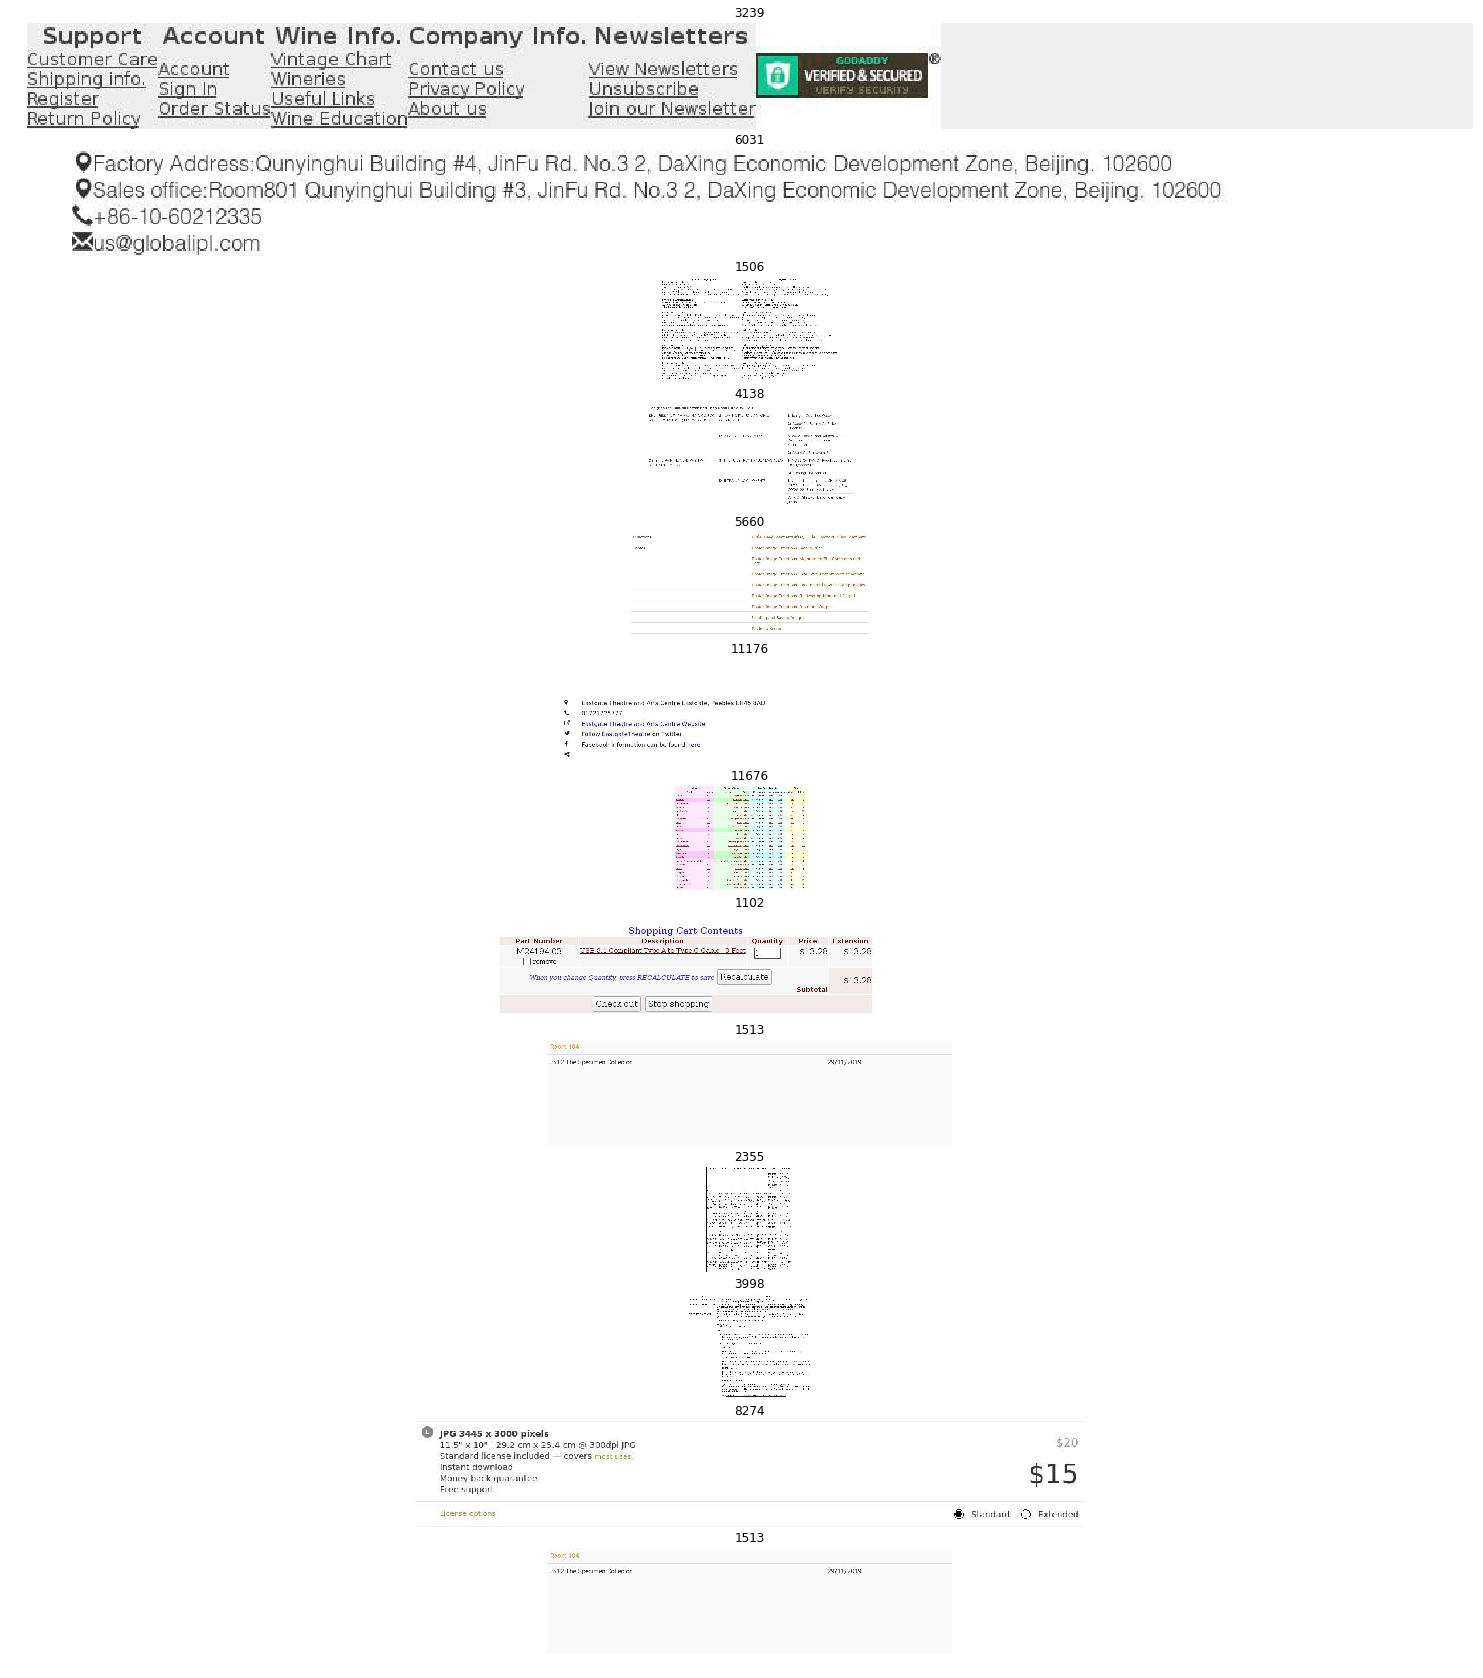

In [7]:
#missclassified Layout tables
#plt.figure(figsize=(40, 40))
plt.rcParams["figure.figsize"] = (30,30)
#plt.rcParams['figure.dpi'] = 400
#for images, labels in train_ds.take(1):
for i in range(len(layout_misscl)):
    ax = plt.subplot(len(layout_misscl), 1, i + 1)
    plt.imshow(layout_misscl[i].astype("uint8"))
    plt.title(layout_ids[i])
    plt.axis("off")

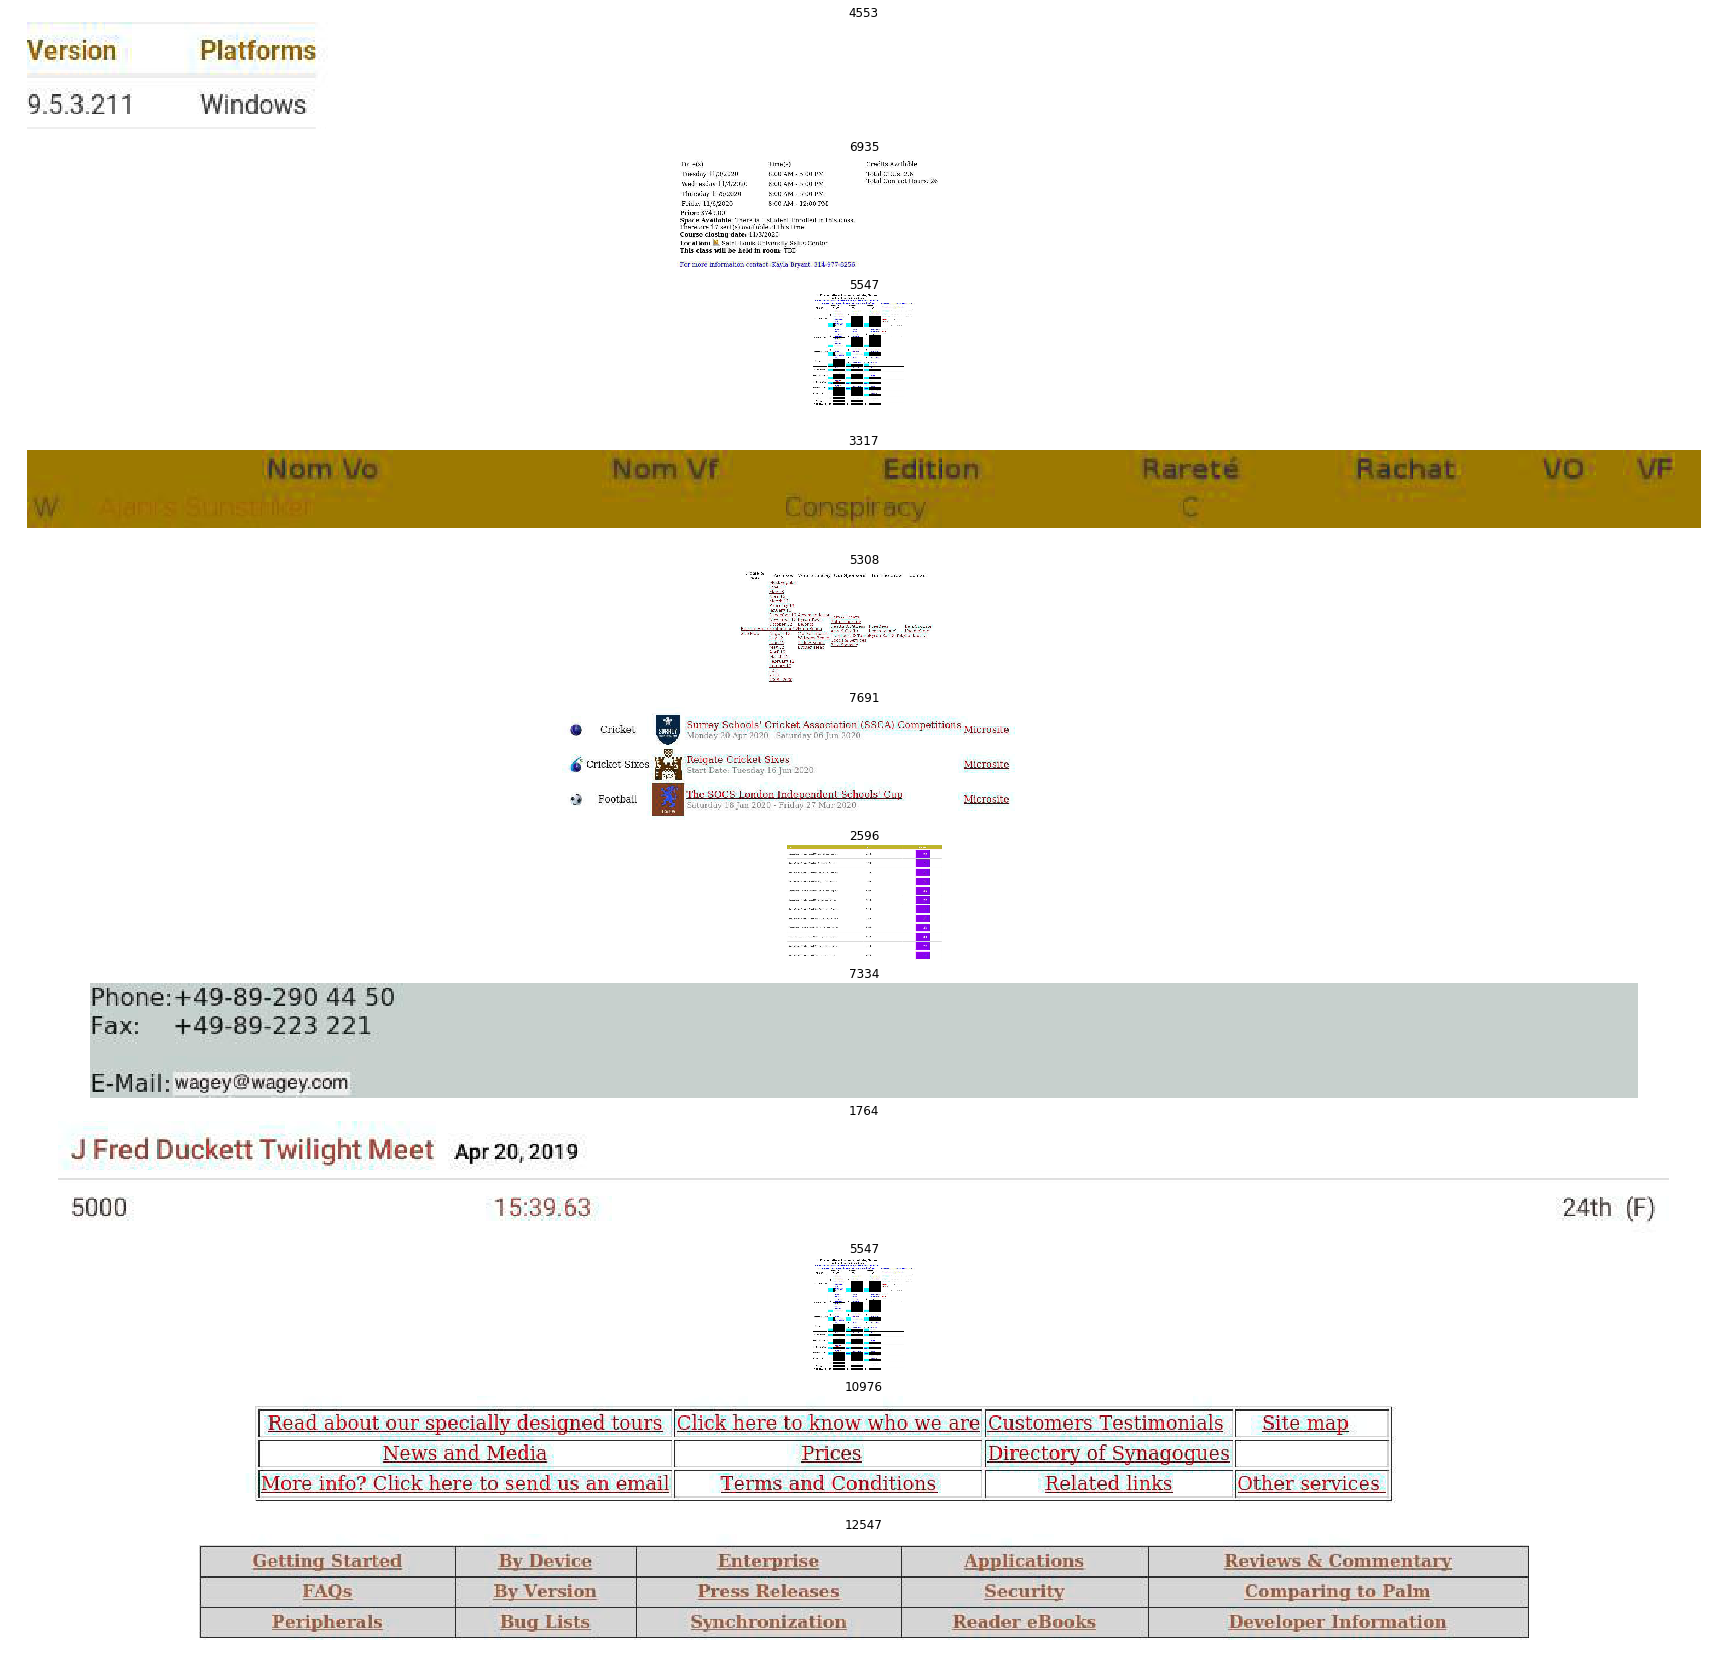

In [8]:
#missclassified Layout tables
#plt.figure(figsize=(40, 40))
plt.rcParams["figure.figsize"] = (30,30)
#plt.rcParams['figure.dpi'] = 400
#for images, labels in train_ds.take(1):
for i in range(len(genuine_misscl)):
    ax = plt.subplot(len(genuine_misscl), 1, i + 1)
    plt.imshow(genuine_misscl[i].astype("uint8"))
    plt.title(genuine_ids[i])
    plt.axis("off")